# 14wk-62: NLP with Disaster Tweets (Text) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

[???](???)

# 2. Imports

In [3]:
#!pip install autogluon.multimodal 

In [4]:
import numpy as np
import pandas as pd
#---#
from autogluon.multimodal import MultiModalPredictor # from autogluon.tabular import TabularPredictor
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [5]:
!kaggle competitions download -c nlp-getting-started

100%|████████████████████████████████████████| 593k/593k [00:00<00:00, 1.09MB/s]
100%|████████████████████████████████████████| 593k/593k [00:00<00:00, 1.09MB/s]

In [6]:
!unzip nlp-getting-started.zip -d data 

Archive:  nlp-getting-started.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          

In [7]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [8]:
!rm -rf data
!rm nlp-getting-started.zip

# 4. 분석

In [9]:
df_train.head()

In [10]:
df_test.head()

In [11]:
# step1 -- pass
# step2 
predictr = MultiModalPredictor(label = 'target')
# step3
predictr.fit(df_train)
# step4 
yhat = predictr.predict(df_test) 

No path specified. Models will be saved in: "AutogluonModels/ag-20231207_033914/"
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
    2 unique label values:  [1, 0]
    If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Global seed set to 0
AutoMM starts to create your model. ✨

- AutoGluon version is 0.8.2.

- Pytorch version is 1.13.1.post200.

- Model will be saved to "/root/Dropbox/MP/AutogluonModels/ag-20231207_033914".

- Validation metric is "roc_auc".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /root/Dropbox/MP/AutogluonModels/ag-20231207_033914
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.gluon.ai

1 GPUs are detected, 

# 5. 제출

In [12]:
sample_submission

In [13]:
sample_submission['target'] = yhat 
sample_submission.to_csv("submission.csv",index=False)

In [14]:
!kaggle competitions submit -c nlp-getting-started -f submission.csv -m "오토글루온, MultiModalPredictor"

100%|██████████████████████████████████████| 22.2k/22.2k [00:01<00:00, 12.4kB/s]
Successfully submitted to Natural Language Processing with Disaster Tweets

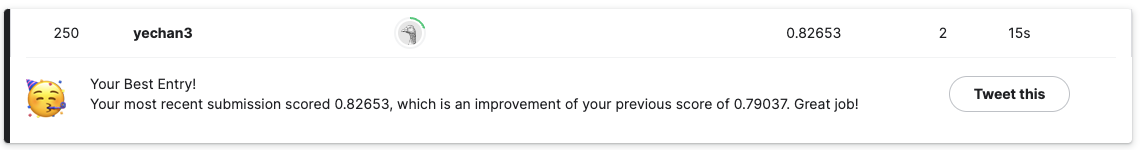

In [15]:
250/1094

이정도가 합리적임